<a href="https://colab.research.google.com/github/Carmen-88/CSC587_CSchuler/blob/main/Homework_4_CSchuler_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_train.csv')

print(df.head())

   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Separate features and target
X = df.drop(columns='class')
y = df['class']

# Reserve last 10 rows for testing
X_train, X_test = X.iloc[:-10], X.iloc[-10:]
y_train, y_test = y.iloc[:-10], y.iloc[-10:]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=False)

accuracy, conf_matrix, class_report



(0.7,
 array([[3, 0],
        [3, 4]]),
 '                 precision    recall  f1-score   support\n\ntested_negative       0.50      1.00      0.67         3\ntested_positive       1.00      0.57      0.73         7\n\n       accuracy                           0.70        10\n      macro avg       0.75      0.79      0.70        10\n   weighted avg       0.85      0.70      0.71        10\n')

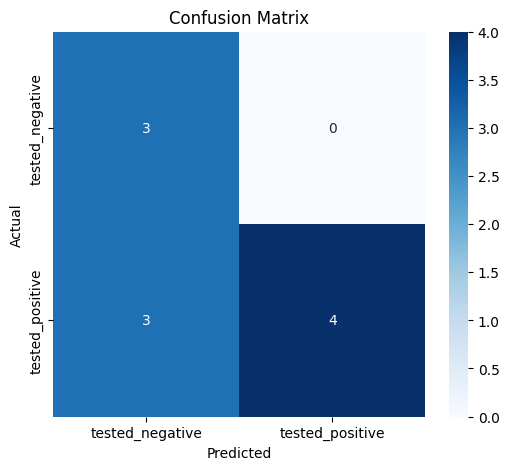

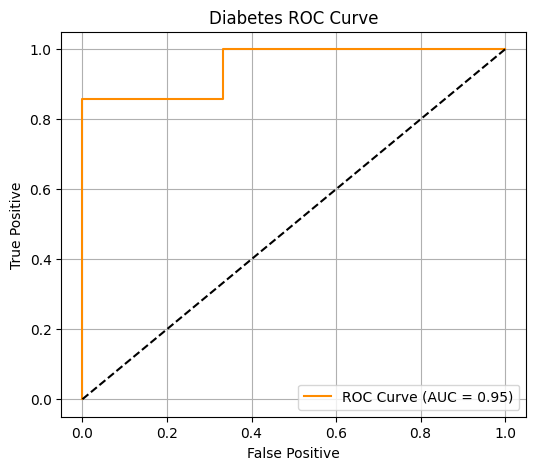

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['tested_negative', 'tested_positive'],
            yticklabels=['tested_negative', 'tested_positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Encode labels for ROC curve
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # tested_negative=0, tested_positive=1

# Decision function scores for ROC
y_scores = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Diabetes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
